In [13]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means, KMeans

In [6]:
import sys

sys.path.append("../src")

In [7]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

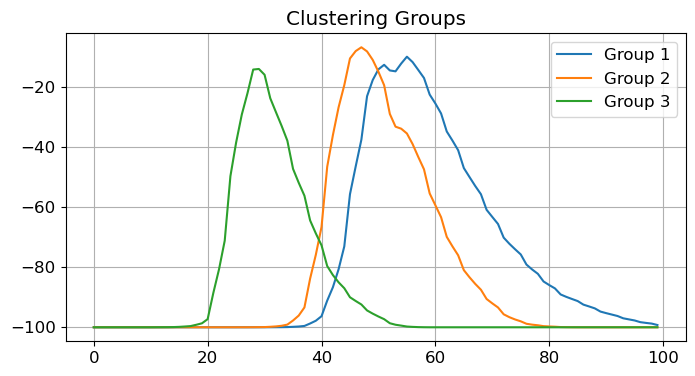

In [9]:
site_key = 'Telephone'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_call_signals.npy', allow_pickle=True)

location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

snr_thresh = 4
good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.set_index(keys=np.arange(len(good_snr_location_calls_sampled)), inplace=True)
fft_signals = compute_features.generate_ffts_for_calls(good_snr_location_calls_sampled, location_call_signals)
welch_signals = compute_features.generate_welchs_for_calls(good_snr_location_calls_sampled, location_call_signals)

In [31]:
kmean = KMeans(n_clusters=3, n_init=10).fit(welch_signals)
kmean

KMeans(n_clusters=3, n_init=10)

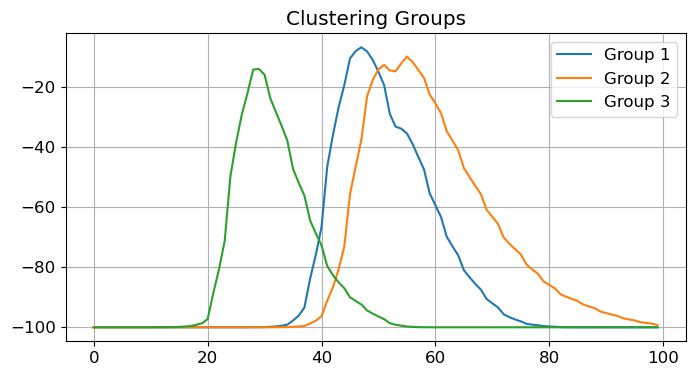

In [32]:
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups')
for i in range(k):
    plt.plot(kmean.cluster_centers_[i], label=f'Group {i+1}')
plt.grid(which='both')
plt.legend()
plt.show()

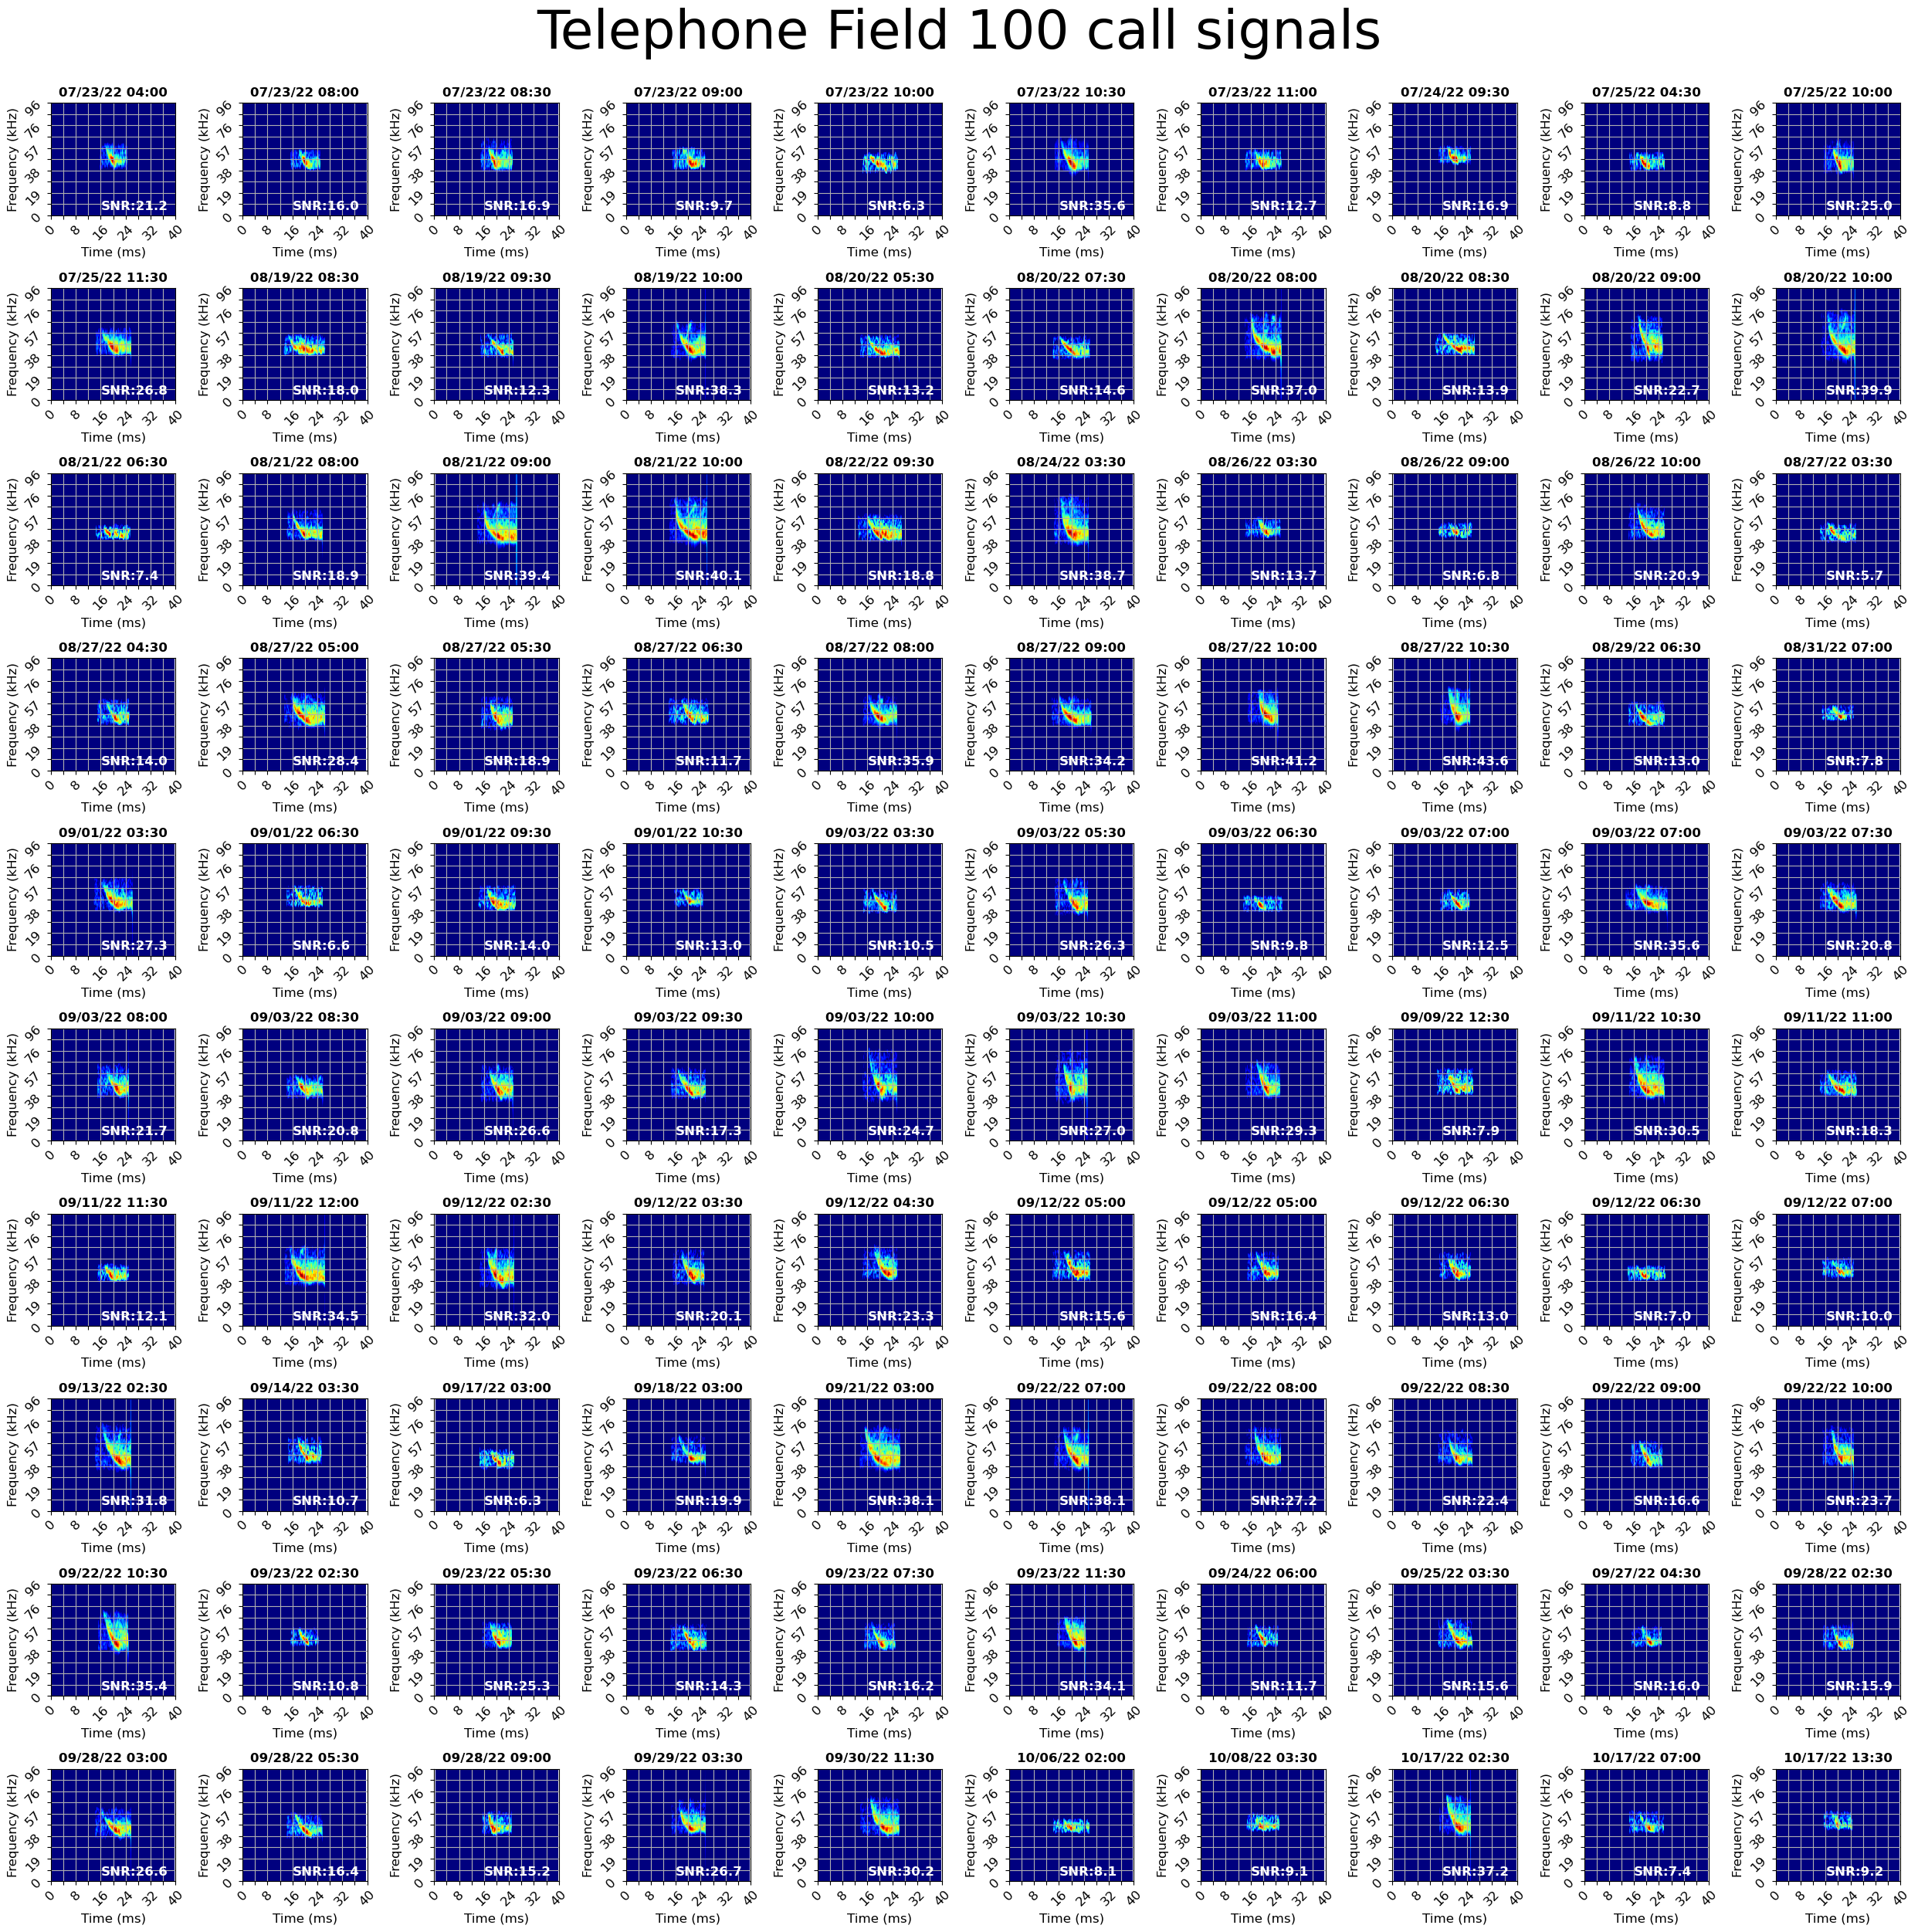

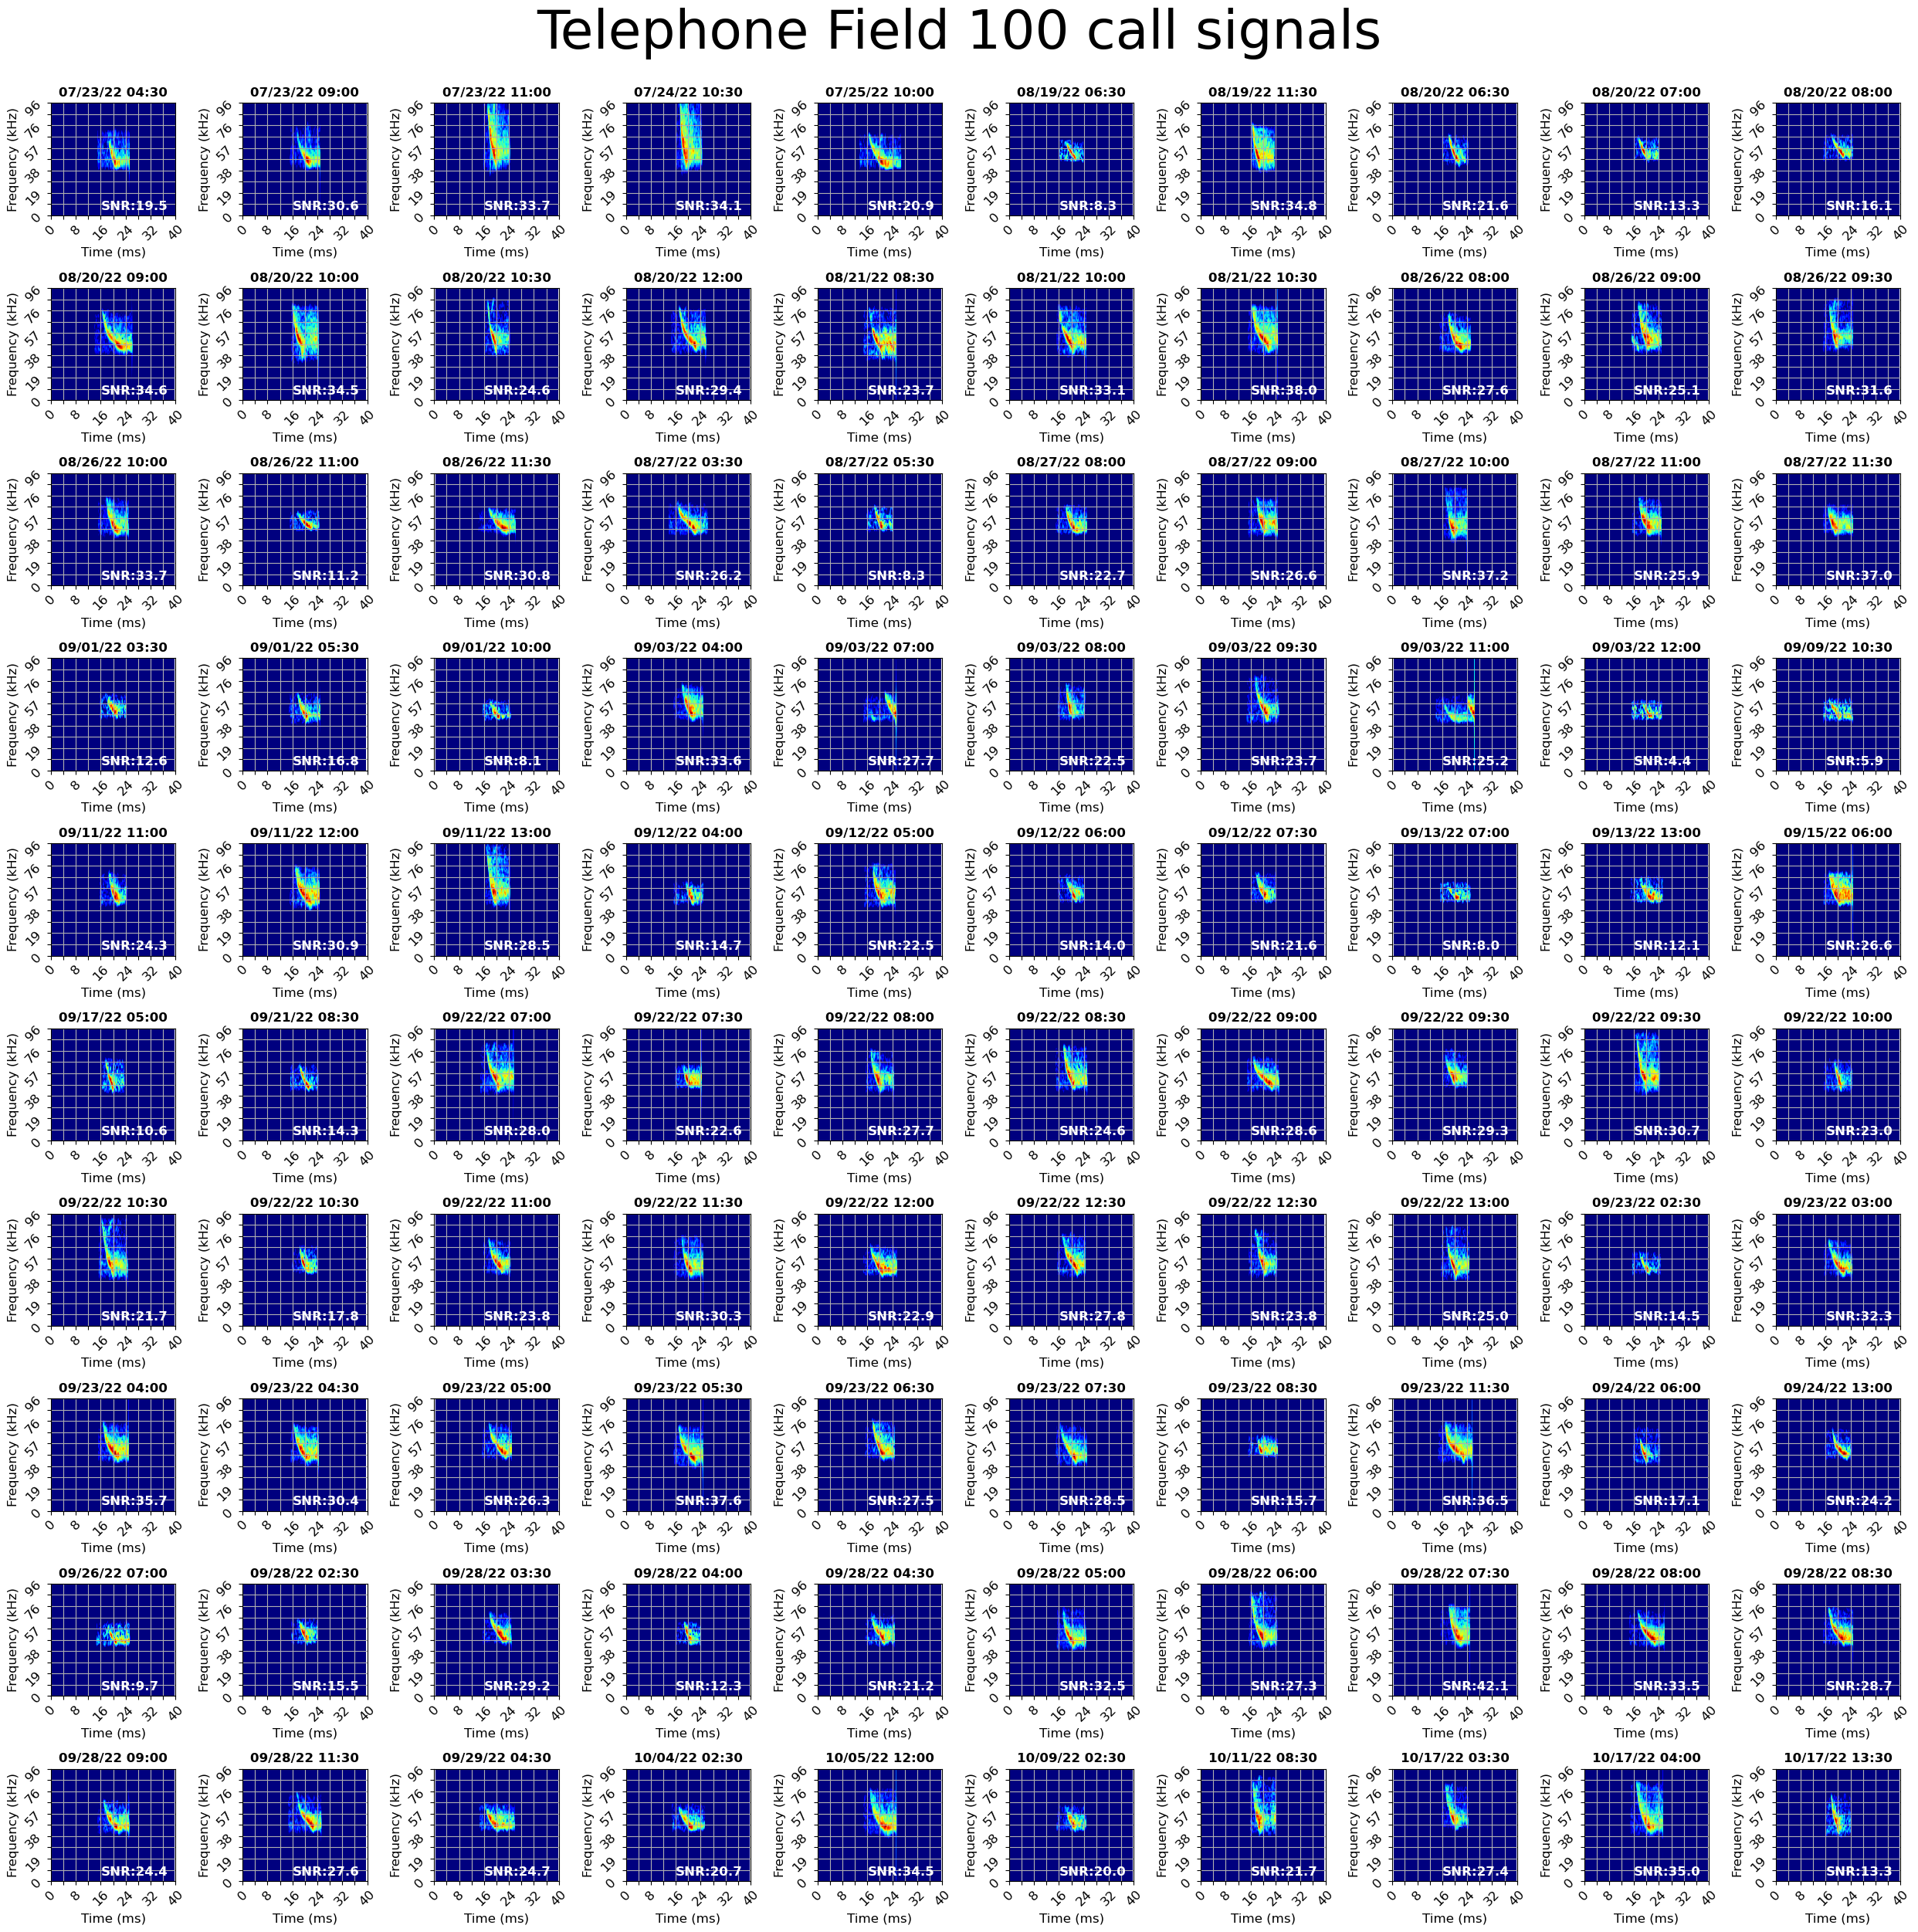

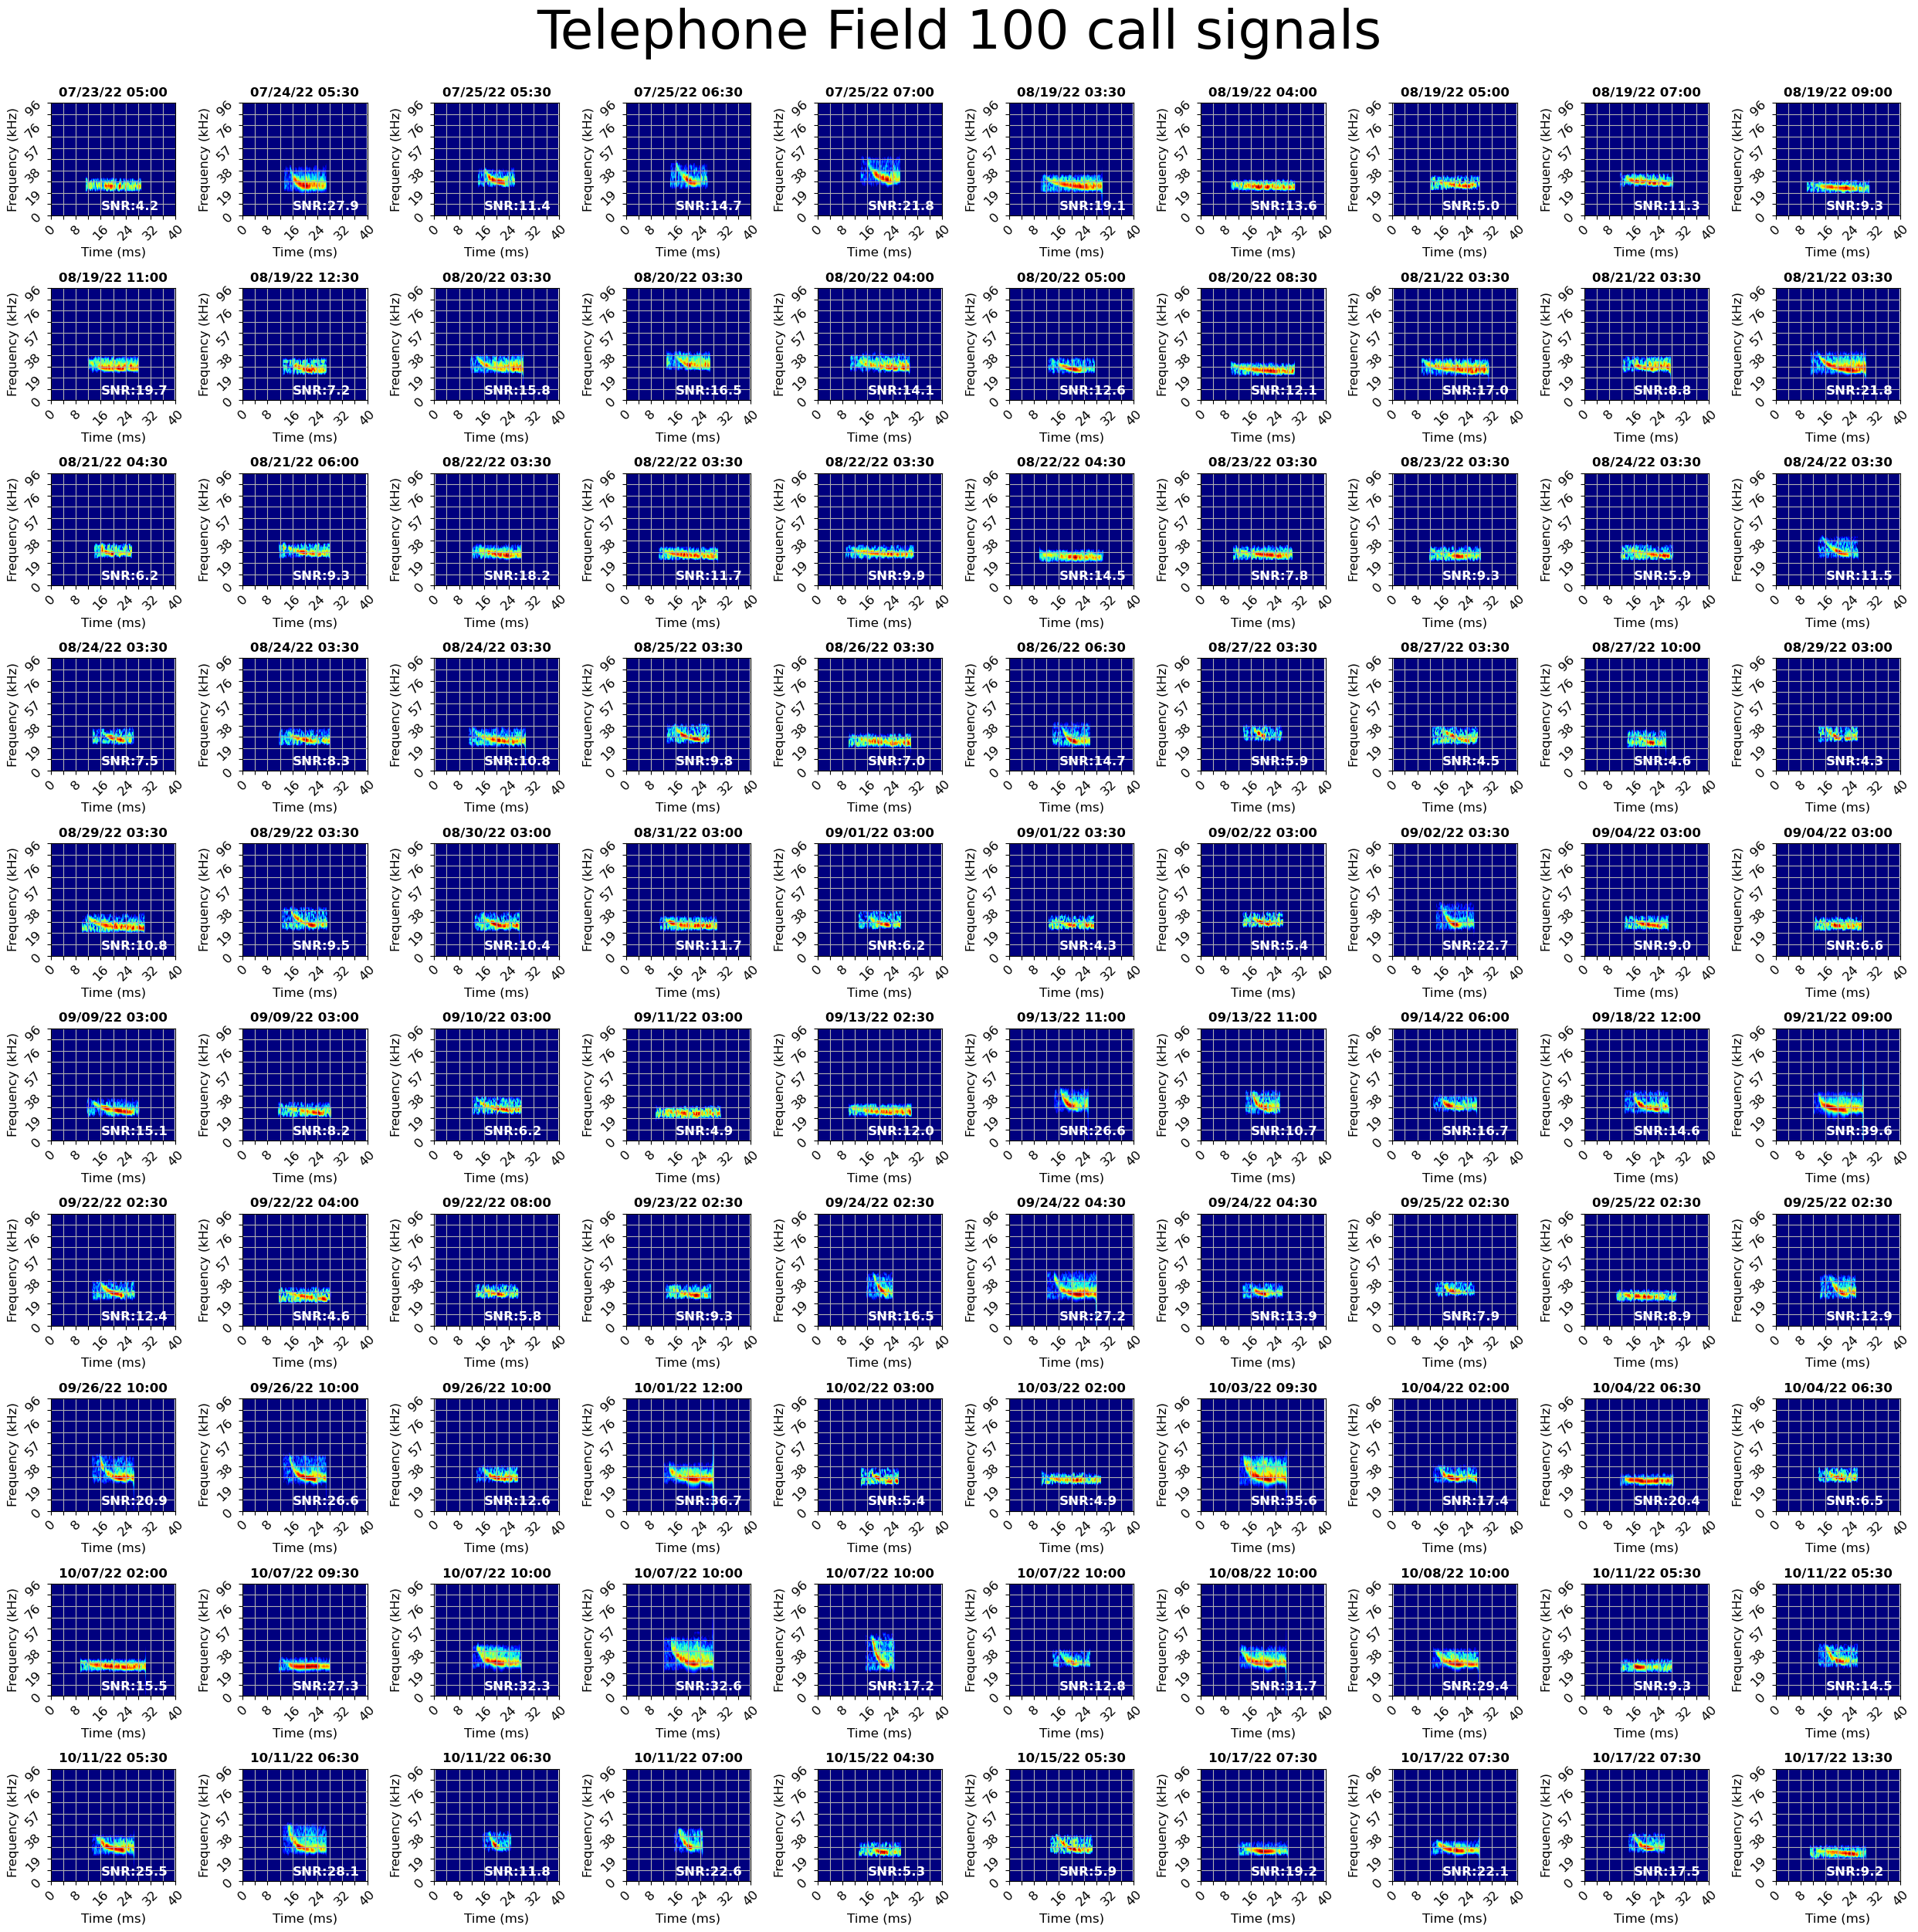

In [33]:
for i in range(k):
    group_calls_sampled = good_snr_location_calls_sampled[kmean.labels_==i].reset_index().drop(['level_0'], axis=1)
    plot_call_features.plot_hundred_calls(group_calls_sampled, location_call_signals, site_key)